In [35]:
import string
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [48]:
# Problem 3 code

def lineSplit(line):
    retList = []
    for c in line:
        retList.append(int(c))
        
    return retList

data_all_ns = open("./100_selection.txt")
data_all_s = open("./100_no_selection.txt")
num_samples = 100
num_reps = 1000
data_all_ns = [line for line in data_all_ns.read().splitlines()]
data_all_s = [line for line in data_all_s.read().splitlines()]
sample_data_s = []
sample_data_ns = []
allele_freqs_s = defaultdict(int)
allele_freqs_ns = defaultdict(int)


# Data starts on line 6
line_num = 6

for i in range(num_reps):
    sample_data_s = data_all_s[line_num:line_num + num_samples]
    sample_data_ns = data_all_ns[line_num:line_num + num_samples]
    data_split_s = [lineSplit(line) for line in sample_data_s]
    data_split_ns = [lineSplit(line) for line in sample_data_ns]
    data_np_s = np.array(data_split_s)
    data_np_ns = np.array(data_split_ns)

    for m in range(data_np_s.shape[1]):
        mut_count_s = sum(data_np_s[:,m])
        allele_freqs_s[mut_count_s] += 1
    for m in range(data_np_ns.shape[1]):
        mut_count_ns = sum(data_np_ns[:,m])
        allele_freqs_ns[mut_count_ns] += 1
        
    

    line_num += num_samples + 4 # Skip 4 lines for metadata
    

for key in allele_freqs_s.keys():
    allele_freqs_s[key] = float(allele_freqs_s[key] * key) / num_reps
for key in allele_freqs_ns.keys():
    allele_freqs_ns[key] = float(allele_freqs_ns[key] * key) / num_reps

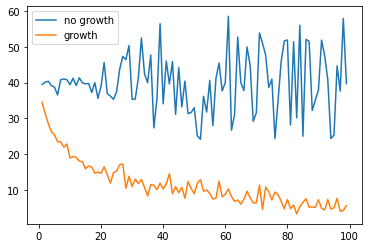

In [49]:
x_vals = [i for i in range(1,num_samples)]
y_vals_s = [allele_freqs_s[i] for i in range(1,num_samples)]
y_vals_ns = [allele_freqs_ns[i] for i in range(1,num_samples)]

plt.plot(x_vals, y_vals_s, label="no growth")
plt.plot(x_vals, y_vals_ns, label="growth")
plt.legend()